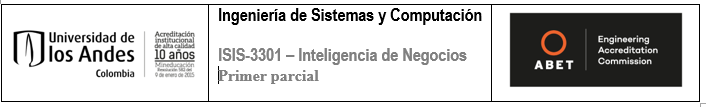

## Código de honor

“Al entregar la solución de este parcial, yo, <span style="color:red"> Juan David Duarte Yara</span> con código <span style="color:red">202215070</span> me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Ni usaré alguna IA para resolver las preguntas del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial”.
Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial”.

## Respuestas a las preguntas del parcial
<span style="color:blue">1. PREGUNTA 1</span>
La clinica quiere prestar atencion adicional a las posibles personas que son mas probables que tengan un reingreso en el futuro, por causas de diabetes. Es posible el uso de aprendizaje automatico en el sentido de que queremos predecir cuales pacientes tendran un posible reingreso por diabetes, esto se puede lograr con ayuda de un modelo de clasificacion entrenado con los datos de los pacientes que se han atendido en urgencias y que han tenido o no han tenido reingresos. Del tal manera que se reduzcan los reingresos y se eviten las consecuencias negativas de estos, que segun el negocio son desconfianza del paciente hacia la IPS, gastos financiaeron, ocupacion en urgenias etc...

<span style="color:blue">2. PREGUNTA 2</span>
El problema es un prolema de clasificacion supervisada, cuya variable objetivo es readmitted = (Si o No). En pocas palabras queremos clasificar a los pacientes en si van a tener reingresos o no, dependiendo de sus perfiles como pacientes (Datos historicos conocidos en el dataset). La tarea de  aprendizaje es decir qur dados los datos de un paciente, este tendra un reingreso (Si o No)
Esta clasificacion se puede llevar a cabo por algunos modelos como arboles de desicion o k vecinos mas cercanos (KNN)

<span style="color:blue">3. PREGUNTA 3</span>
RTA://

<span style="color:blue">4. PREGUNTA 4</span>
RTA://

## Anexo Notebook ejecutado

## 0 importacion de librerias

In [1205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

## 1. carga de los datos

In [1206]:
data = pd.read_csv("./diabetic_data.csv", sep=",", encoding="utf-8", nrows=200)

In [1207]:
data.shape
data.head()

,race,num_lab_procedures,num_medications,age,gender,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted
0,Caucasian,88,32,5,F,9,9,0,1,1,1,Yes,Yes,Yes,0,0,Yes
1,Caucasian,43,19,6,F,4,8,1,1,2,1,Yes,Yes,Yes,0,0,No
2,Caucasian,24,8,5,M,4,5,0,17,2,1,No,No,No,0,0,No
3,Caucasian,4,8,6,F,1,8,0,7,1,1,No,No,No,0,0,Yes
4,AfricanAmerican,46,16,7,M,4,6,0,7,1,1,No,Yes,Yes,0,0,Yes


In [1208]:
data.sample(4)

,race,num_lab_procedures,num_medications,age,gender,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted
192,Caucasian,56,20,4,F,8,5,0,17,6,1,No,Yes,Yes,0,0,No
187,Caucasian,43,12,8,M,10,8,1,4,3,18,No,No,No,1,0,No
73,AfricanAmerican,20,24,9,M,5,9,2,1,3,3,Yes,Yes,Yes,1,0,No
40,Caucasian,47,12,6,F,4,9,1,20,2,1,Yes,Yes,Yes,0,0,Yes


In [1209]:
# Podemos ver los tipos de todas la variables.
data.dtypes

race                        object
num_lab_procedures           int64
num_medications              int64
age                          int64
gender                      object
time_in_hospital             int64
number_diagnoses             int64
num_procedures               int64
admission_source_id          int64
admission_type_id            int64
discharge_disposition_id     int64
insulin                     object
diabetesMed                 object
change                      object
number_inpatient             int64
number_emergency             int64
readmitted                  object
dtype: object

In [1210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      200 non-null    object
 1   num_lab_procedures        200 non-null    int64 
 2   num_medications           200 non-null    int64 
 3   age                       200 non-null    int64 
 4   gender                    200 non-null    object
 5   time_in_hospital          200 non-null    int64 
 6   number_diagnoses          200 non-null    int64 
 7   num_procedures            200 non-null    int64 
 8   admission_source_id       200 non-null    int64 
 9   admission_type_id         200 non-null    int64 
 10  discharge_disposition_id  200 non-null    int64 
 11  insulin                   200 non-null    object
 12  diabetesMed               200 non-null    object
 13  change                    200 non-null    object
 14  number_inpatient          

### 2. descripcion de los Datos

In [1211]:
columnas_categoricas = ["race", "gender", "age", "admission_type_id", "discharge_disposition_id", "admission_source_id", "insulin", "change", "diabetesMed"]

columnas_numericas = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_emergency", "number_inpatient", "number_diagnoses"]

variable_objetivo = ["readmitted"]

Descripcion de las variables numericas

In [1212]:

data[columnas_numericas].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,4.425000,43.290000,1.49500,16.500000,0.105000,0.200000,7.225000
std,3.036524,20.873534,1.80451,9.795907,0.366944,0.609803,1.897996
min,1.000000,1.000000,0.00000,2.000000,0.000000,0.000000,3.000000
25%,2.000000,34.000000,0.00000,10.000000,0.000000,0.000000,6.000000
50%,4.000000,46.000000,1.00000,15.000000,0.000000,0.000000,7.500000
75%,6.000000,56.000000,2.00000,21.000000,0.000000,0.000000,9.000000
max,14.000000,96.000000,6.00000,64.000000,3.000000,4.000000,11.000000


Informacion de las variables categoricas

In [1213]:
data[columnas_categoricas + variable_objetivo].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      200 non-null    object
 1   gender                    200 non-null    object
 2   age                       200 non-null    int64 
 3   admission_type_id         200 non-null    int64 
 4   discharge_disposition_id  200 non-null    int64 
 5   admission_source_id       200 non-null    int64 
 6   insulin                   200 non-null    object
 7   change                    200 non-null    object
 8   diabetesMed               200 non-null    object
 9   readmitted                200 non-null    object
dtypes: int64(4), object(6)
memory usage: 15.8+ KB


Conteo de variables categoricas

In [1214]:
data["race"].value_counts()

race
Caucasian          143
AfricanAmerican     43
Other               11
Asian                2
Hispanic             1
Name: count, dtype: int64

In [1215]:
data["gender"].value_counts()

gender
F    109
M     91
Name: count, dtype: int64

In [1216]:
data["age"].value_counts().sort_index()

age
2      2
3      3
4     16
5     19
6     39
7     38
8     51
9     30
10     2
Name: count, dtype: int64

Aca se puede ver como la mayoria de personas en los datos se concentran entre los 40 y 80 anios (5 a 9)

In [1217]:
df_readmitted = data[data["readmitted"] == "Yes"]
df_readmitted["age"].value_counts().sort_index()



age
3      1
4      3
5      5
6     17
7     18
8     21
9     13
10     1
Name: count, dtype: int64

In [1218]:
df_readmitted = data[data["readmitted"] == "No"]
df_readmitted["age"].value_counts().sort_index()

age
2      2
3      2
4     13
5     14
6     22
7     20
8     30
9     17
10     1
Name: count, dtype: int64

#### Conteo de personas con reingresos y sin reingresos

In [1219]:
data["readmitted"].value_counts()

readmitted
No     121
Yes     79
Name: count, dtype: int64

Aca se ve un desbalanceo no muy grande en las categorias positiva y negativa

Ahora veamos 

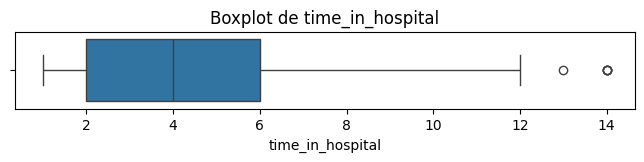

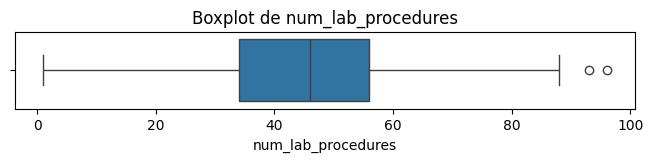

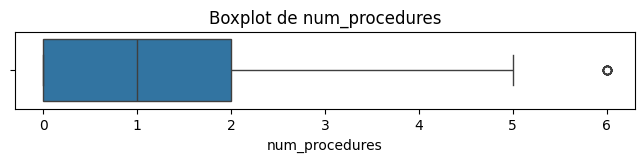

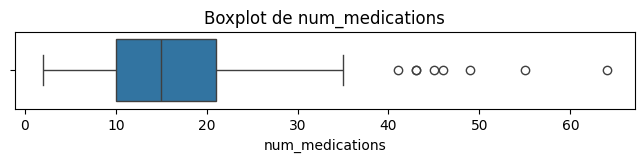

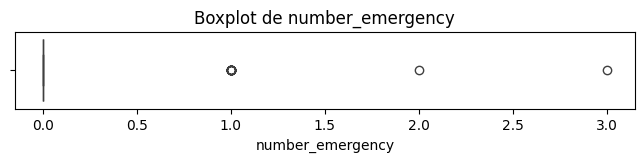

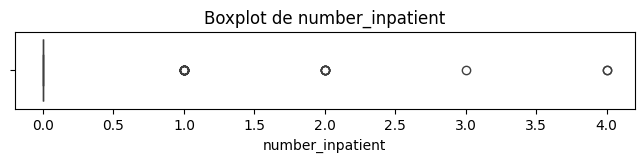

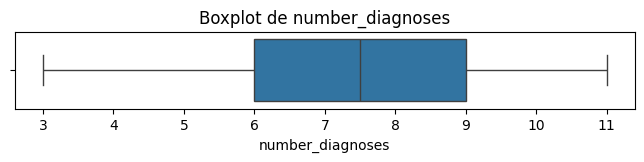

In [1220]:
for var in columnas_numericas:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=data[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.show()

En general se ve que Revisemos los outliers a fondo

In [1221]:
def contar_outliers(df):
    outliers_count = {}

    for col in columnas_numericas:  
        Q1 = data[col].quantile(0.25)  
        Q3 = data[col].quantile(0.75)  
        IQR = Q3 - Q1  
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
        outliers_count[col] = outliers * 100 / data[col].shape[0]
        
    return pd.DataFrame.from_dict(outliers_count, orient='index', columns=['Outliers'])

print("Porcentaje de outliers por variable")
outliers_df = contar_outliers(data)
outliers_df

Porcentaje de outliers por variable


,Outliers
time_in_hospital,2.5
num_lab_procedures,1.0
num_procedures,6.5
num_medications,4.0
number_emergency,9.0
number_inpatient,13.0
number_diagnoses,0.0


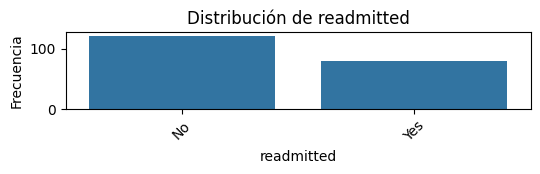

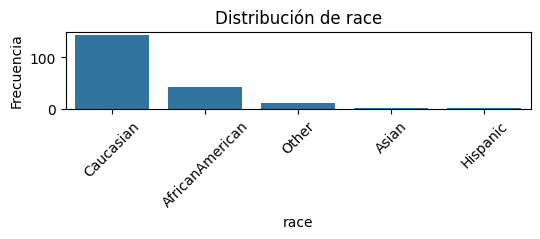

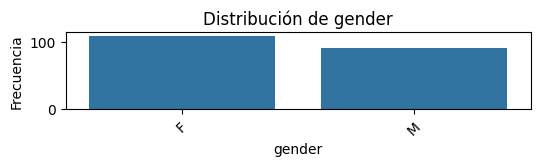

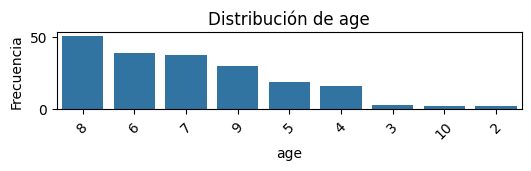

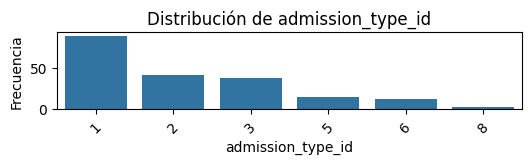

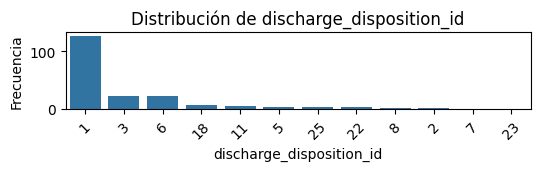

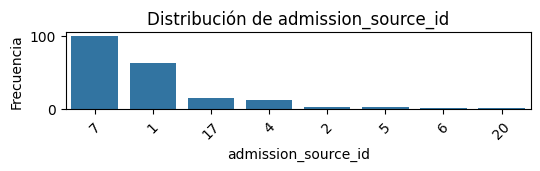

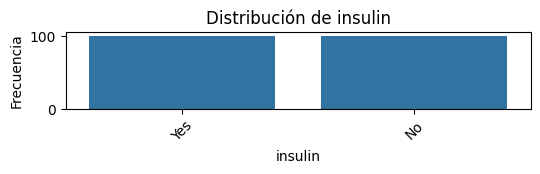

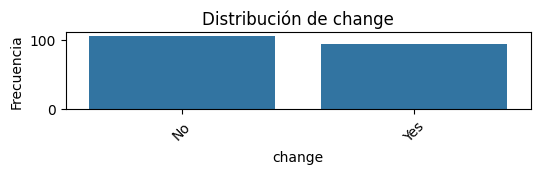

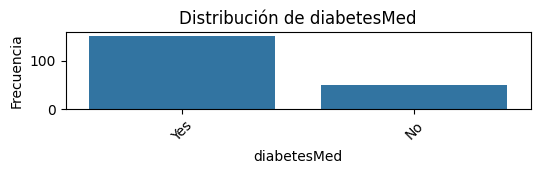

In [1222]:
for var in variable_objetivo + columnas_categoricas:
    plt.figure(figsize=(6, 1))
    sns.countplot(x=data[var], order=data[var].value_counts().index)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

## 2. correlaion

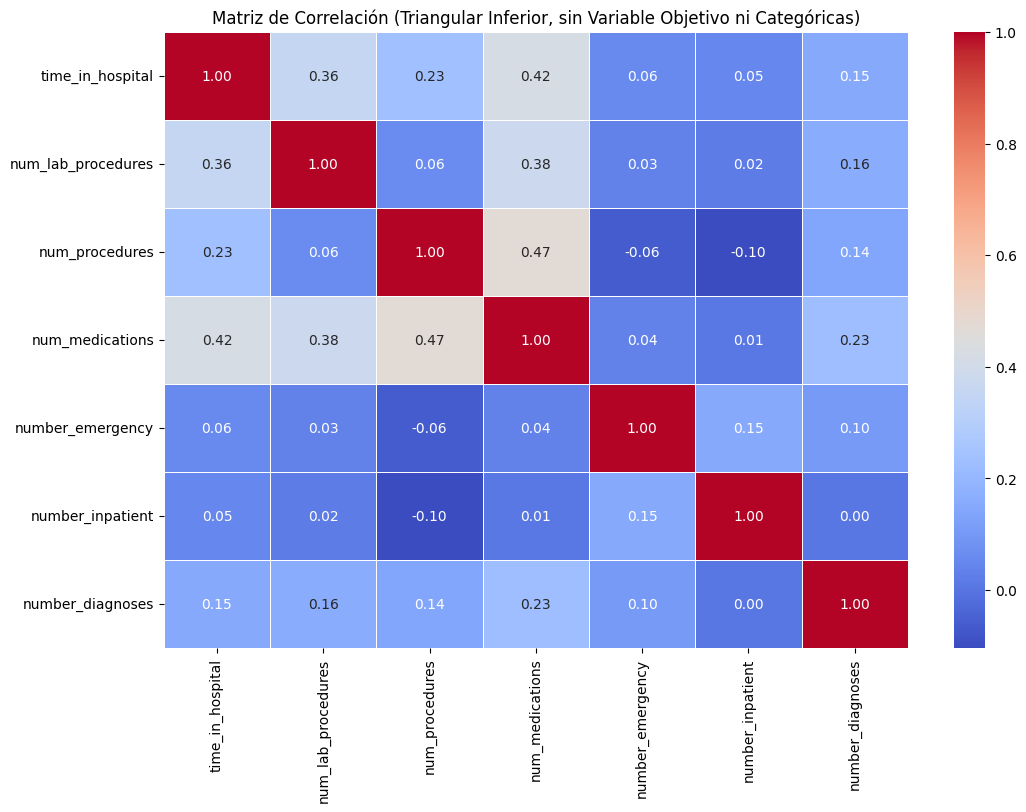

In [1223]:
import numpy as np

matriz_correlaciones = data[columnas_numericas].corr()

mask = np.triu(np.ones_like(matriz_correlaciones, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, mask=None, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación (Triangular Inferior, sin Variable Objetivo ni Categóricas)")
plt.show()

## 3. Limpieza y preprocesamiento de datos

In [1224]:
data_t = data.copy()

### 3.1. Completitud

In [1225]:
data_t.isnull().sum()

race                        0
num_lab_procedures          0
num_medications             0
age                         0
gender                      0
time_in_hospital            0
number_diagnoses            0
num_procedures              0
admission_source_id         0
admission_type_id           0
discharge_disposition_id    0
insulin                     0
diabetesMed                 0
change                      0
number_inpatient            0
number_emergency            0
readmitted                  0
dtype: int64

No hay registros nulos


In [1226]:
(data_t.isnull().sum()/data_t.shape[0]).sort_values(ascending=False)

race                        0.0
num_lab_procedures          0.0
num_medications             0.0
age                         0.0
gender                      0.0
time_in_hospital            0.0
number_diagnoses            0.0
num_procedures              0.0
admission_source_id         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
insulin                     0.0
diabetesMed                 0.0
change                      0.0
number_inpatient            0.0
number_emergency            0.0
readmitted                  0.0
dtype: float64

In [1227]:
data_t = data_t.dropna()

### 3.2. Unicidad

No existen atributos en los que se sepan que una instancia le pertenece a alguna persona en particular, por o tanto no hay forma de saber si dos instancias iguales pertencen a una misma persona o si simplemente dos personas tienen exactamente los mismos datos

In [1228]:
data_t.duplicated(keep=False).sum()

np.int64(0)

In [1229]:
data_t.loc[data_t.duplicated(keep=False)].sort_values(by=["num_lab_procedures"]).head(4)

,race,num_lab_procedures,num_medications,age,gender,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted


In [1230]:
numeric_cols= columnas_numericas	
for col in numeric_cols:
    num_duplicated = data_t.duplicated(subset = col).sum()
    print(f"Valores duplicados para la columna {col}: {num_duplicated}")

Valores duplicados para la columna time_in_hospital: 186
Valores duplicados para la columna num_lab_procedures: 131
Valores duplicados para la columna num_procedures: 193
Valores duplicados para la columna num_medications: 161
Valores duplicados para la columna number_emergency: 196
Valores duplicados para la columna number_inpatient: 195
Valores duplicados para la columna number_diagnoses: 192


In [1231]:
data_t.loc[data_t.duplicated(subset= "time_in_hospital")].sort_values("time_in_hospital").head(6)

,race,num_lab_procedures,num_medications,age,gender,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted
7,Caucasian,51,32,6,M,1,5,3,7,8,8,Yes,Yes,No,0,0,No
6,Hispanic,3,4,7,M,1,9,0,1,5,1,Yes,Yes,Yes,0,0,Yes
14,AfricanAmerican,39,16,5,M,1,4,3,1,3,1,No,Yes,No,0,0,No
10,Caucasian,3,10,6,F,1,7,0,1,2,1,Yes,Yes,Yes,0,0,No
20,Caucasian,39,13,8,F,1,5,1,1,2,1,No,Yes,No,1,0,No
16,Caucasian,52,8,6,M,1,9,0,7,1,1,No,No,No,0,0,Yes


In [1232]:
print(f"Porcentage de duplicados: {data.duplicated(keep=False).sum() / data.shape[0] * 100:.2f}%")

Porcentage de duplicados: 0.00%


Como el porcentage de es 2.5%, es razonable eliminar las filas diplicadas. Teniendo en cuenta que no se pueden distinguir si los duplicados provienen de la misma persona o no

In [1233]:
data_t = data_t.drop_duplicates()

In [1234]:
data_t.duplicated(keep=False).sum()

np.int64(0)

In [1235]:
print(f"Porcentage de duplicados: {data_t.duplicated(keep=False).sum() / data_t.shape[0] * 100:.2f}%")

Porcentage de duplicados: 0.00%


### 3.3. Consistencia


#### Categoricos

In [1236]:
#data_t["class"] = data_t["class"].replace({"S": "STAR", "G": "GALAXY", "QUASAR": "QSO"})
data_t.dtypes

race                        object
num_lab_procedures           int64
num_medications              int64
age                          int64
gender                      object
time_in_hospital             int64
number_diagnoses             int64
num_procedures               int64
admission_source_id          int64
admission_type_id            int64
discharge_disposition_id     int64
insulin                     object
diabetesMed                 object
change                      object
number_inpatient             int64
number_emergency             int64
readmitted                  object
dtype: object

#### Numericos

In [1237]:
data_t[columnas_numericas].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,4.425000,43.290000,1.49500,16.500000,0.105000,0.200000,7.225000
std,3.036524,20.873534,1.80451,9.795907,0.366944,0.609803,1.897996
min,1.000000,1.000000,0.00000,2.000000,0.000000,0.000000,3.000000
25%,2.000000,34.000000,0.00000,10.000000,0.000000,0.000000,6.000000
50%,4.000000,46.000000,1.00000,15.000000,0.000000,0.000000,7.500000
75%,6.000000,56.000000,2.00000,21.000000,0.000000,0.000000,9.000000
max,14.000000,96.000000,6.00000,64.000000,3.000000,4.000000,11.000000


### 3.4. Validez


In [1238]:
valid_genders = ['M', 'F']
if not data_t['gender'].isin(valid_genders).all():
    print("Existen valores inválidos en 'gender'")
else:
    print("Los valores en 'gender' son válidos.")

Los valores en 'gender' son válidos.


In [1239]:
pd.DataFrame(data_t["insulin"].unique()) #Con todos

,0
0,Yes
1,No


## 4. Transformacion de los Datos

In [1240]:
columnas_categoricas = ["race", "gender", "age", "admission_type_id", "discharge_disposition_id", "admission_source_id", "insulin", "change", "diabetesMed"]

columnas_numericas = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_emergency", "number_inpatient", "number_diagnoses"]

variable_objetivo = ["readmitted"]

In [1241]:
data_t.head(4)

,race,num_lab_procedures,num_medications,age,gender,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted
0,Caucasian,88,32,5,F,9,9,0,1,1,1,Yes,Yes,Yes,0,0,Yes
1,Caucasian,43,19,6,F,4,8,1,1,2,1,Yes,Yes,Yes,0,0,No
2,Caucasian,24,8,5,M,4,5,0,17,2,1,No,No,No,0,0,No
3,Caucasian,4,8,6,F,1,8,0,7,1,1,No,No,No,0,0,Yes


In [1242]:
codificacion = LabelEncoder()

In [1243]:
data_t["readmitted"] = codificacion.fit_transform(data_t["readmitted"])
data_t["readmitted"].value_counts()

readmitted
0    121
1     79
Name: count, dtype: int64

In [1244]:
data_t["change"] = codificacion.fit_transform(data_t["change"])
data_t["change"].value_counts()


change
0    106
1     94
Name: count, dtype: int64

In [1245]:
data_t["diabetesMed"] = codificacion.fit_transform(data_t["diabetesMed"])
data_t["diabetesMed"].value_counts()

diabetesMed
1    151
0     49
Name: count, dtype: int64

In [1246]:
data_t["insulin"] = codificacion.fit_transform(data_t["insulin"])
data_t["insulin"].value_counts()

insulin
1    100
0    100
Name: count, dtype: int64

In [1247]:
data_t.head(4)

,race,num_lab_procedures,num_medications,age,gender,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted
0,Caucasian,88,32,5,F,9,9,0,1,1,1,1,1,1,0,0,1
1,Caucasian,43,19,6,F,4,8,1,1,2,1,1,1,1,0,0,0
2,Caucasian,24,8,5,M,4,5,0,17,2,1,0,0,0,0,0,0
3,Caucasian,4,8,6,F,1,8,0,7,1,1,0,0,0,0,0,1


In [1248]:
data.shape

(200, 17)

In [1249]:
data_t.head()

,race,num_lab_procedures,num_medications,age,gender,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted
0,Caucasian,88,32,5,F,9,9,0,1,1,1,1,1,1,0,0,1
1,Caucasian,43,19,6,F,4,8,1,1,2,1,1,1,1,0,0,0
2,Caucasian,24,8,5,M,4,5,0,17,2,1,0,0,0,0,0,0
3,Caucasian,4,8,6,F,1,8,0,7,1,1,0,0,0,0,0,1
4,AfricanAmerican,46,16,7,M,4,6,0,7,1,1,0,1,1,0,0,1


In [1250]:
data_t = pd.get_dummies(data_t, columns=['race', 'gender'], drop_first=True)
data_t.head(4)

,num_lab_procedures,num_medications,age,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_M
0,88,32,5,9,9,0,1,1,1,1,1,1,0,0,1,False,True,False,False,False
1,43,19,6,4,8,1,1,2,1,1,1,1,0,0,0,False,True,False,False,False
2,24,8,5,4,5,0,17,2,1,0,0,0,0,0,0,False,True,False,False,True
3,4,8,6,1,8,0,7,1,1,0,0,0,0,0,1,False,True,False,False,False


In [1251]:
data_t = data_t.astype(int)
data_t.head(4)

,num_lab_procedures,num_medications,age,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_M
0,88,32,5,9,9,0,1,1,1,1,1,1,0,0,1,0,1,0,0,0
1,43,19,6,4,8,1,1,2,1,1,1,1,0,0,0,0,1,0,0,0
2,24,8,5,4,5,0,17,2,1,0,0,0,0,0,0,0,1,0,0,1
3,4,8,6,1,8,0,7,1,1,0,0,0,0,0,1,0,1,0,0,0


## Inicio del modelo

In [1252]:
from sklearn.model_selection import train_test_split

Y = data_t['readmitted']
X = data_t.drop(['readmitted'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train



,num_lab_procedures,num_medications,age,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_M
131,54,27,8,7,9,6,4,2,3,1,1,1,0,0,0,1,0,0,0
96,40,3,5,1,9,0,7,1,1,0,0,0,0,0,0,1,0,0,1
181,6,6,7,1,7,0,7,1,1,0,0,0,0,0,0,1,0,0,1
19,51,8,7,2,4,0,7,6,1,0,1,1,0,0,1,0,0,0,1
153,26,11,9,1,7,0,17,5,2,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,52,11,9,5,9,0,7,1,3,1,1,1,0,0,0,1,0,0,0
192,56,20,4,8,5,0,17,6,1,0,1,1,0,0,0,1,0,0,0
117,6,17,5,2,7,3,1,2,1,1,1,1,0,0,0,1,0,0,1
47,69,20,9,14,9,2,1,2,6,0,1,0,0,0,0,1,0,0,1


In [1253]:
print("NaN en X_train:", np.isnan(X_train).sum().sum())
print("Inf en X_train:", np.isinf(X_train).sum().sum())

X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(0)


NaN en X_train: 0
Inf en X_train: 0


In [1254]:
X_train.size

2660

# Clasificacion

In [1255]:
smt = SMOTE()
X_train_clasi, Y_smote = smt.fit_resample(X_train, Y_train)
Y_train_clasi = Y_smote.values.ravel()   

X_train_clasi = X_train_clasi[columnas_numericas]
X_test_clasi = X_test[columnas_numericas]

In [1256]:
X_train_clasi.size

1316

In [1257]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

scaler = StandardScaler()
X_train_clasi = pd.DataFrame(scaler.fit_transform(X_train_clasi), columns=columnas_numericas)
X_test_clasi = pd.DataFrame(scaler.transform(X_test_clasi), columns=columnas_numericas)

X_train_clasi.head(4)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses
0,0.919566,0.543122,2.498272,1.051013,-0.276702,-0.29188,1.001089
1,-1.122305,-0.093625,-0.793843,-1.377134,-0.276702,-0.29188,1.001089
2,-1.122305,-1.640012,-0.793843,-1.073616,-0.276702,-0.29188,-0.033003
3,-0.781993,0.406676,-0.793843,-0.871270,-0.276702,-0.29188,-1.584140


In [1258]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) 
neigh = neigh.fit(X_train_clasi, Y_train_clasi) 

y_pred_train1 = neigh.predict(X_train_clasi) 
print('Exactitud: %.2f' % accuracy_score(Y_train_clasi, y_pred_train1))
print("Recall: {}".format(recall_score(Y_train_clasi,y_pred_train1)))
print("Precisión: {}".format(precision_score(Y_train_clasi,y_pred_train1)))
print("Puntuación F1: {}".format(f1_score(Y_train_clasi,y_pred_train1)))

print(classification_report(Y_train_clasi, y_pred_train1))

Exactitud: 0.82
Recall: 0.8191489361702128
Precisión: 0.8191489361702128
Puntuación F1: 0.8191489361702128
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        94
           1       0.82      0.82      0.82        94

    accuracy                           0.82       188
   macro avg       0.82      0.82      0.82       188
weighted avg       0.82      0.82      0.82       188



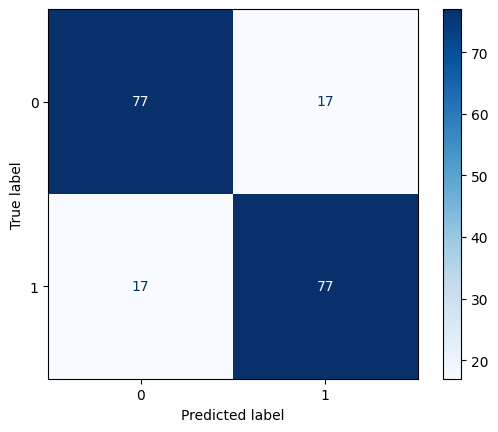

In [1259]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_train_clasi, y_pred_train1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [1260]:
y_pred_test12 = neigh.predict(X_test_clasi) # y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred_test12))
print("Recall: {}".format(recall_score(Y_test,y_pred_test12)))
print("Precisión: {}".format(precision_score(Y_test,y_pred_test12)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred_test12)))

Exactitud: 0.55
Recall: 0.5454545454545454
Precisión: 0.6
Puntuación F1: 0.5714285714285714


In [1261]:
param_grid = {
    'n_neighbors': [3, 5, 7],  # Número de vecinos a probar
    "weights": ['uniform', 'distance'] 
}

In [1262]:
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

mejor_modelo = GridSearchCV(neigh, param_grid, cv=2)

mejor_modelo.fit(X_train_clasi, Y_smote)
print(mejor_modelo.best_params_)

best_knn = mejor_modelo.best_estimator_

y_pred_train = best_knn.predict(X_train_clasi) # y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_smote, y_pred_train))
print("Recall: {}".format(recall_score(Y_smote,y_pred_train)))
print("Precisión: {}".format(precision_score(Y_smote,y_pred_train)))
print("Puntuación F1: {}".format(f1_score(Y_smote,y_pred_train)))

{'n_neighbors': 3, 'weights': 'distance'}
Exactitud: 1.00
Recall: 1.0
Precisión: 1.0
Puntuación F1: 1.0


C:\Users\surface\AppData\Roaming\Python\Python311\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Arboles de desicion

In [1263]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state = 0)
arbol = arbol.fit(X_train_clasi, Y_train_clasi)

In [1264]:
y_pred_train2 = arbol.predict(X_train_clasi)
print("ENTRENAMIENTO")
print('Exactitud: %.2f' % accuracy_score(Y_smote, y_pred_train2))
print("Recall: {}".format(recall_score(Y_smote, y_pred_train2, average='macro')))
print("Precisión: {}".format(precision_score(Y_smote, y_pred_train2, average='macro')))
print("Puntuación F1: {}".format(f1_score(Y_smote, y_pred_train2, average='macro')))
print(classification_report(Y_smote, y_pred_train2))

ENTRENAMIENTO
Exactitud: 0.65
Recall: 0.648936170212766
Precisión: 0.7776371308016878
Puntuación F1: 0.6029185867895546
              precision    recall  f1-score   support

           0       0.97      0.31      0.47        94
           1       0.59      0.99      0.74        94

    accuracy                           0.65       188
   macro avg       0.78      0.65      0.60       188
weighted avg       0.78      0.65      0.60       188



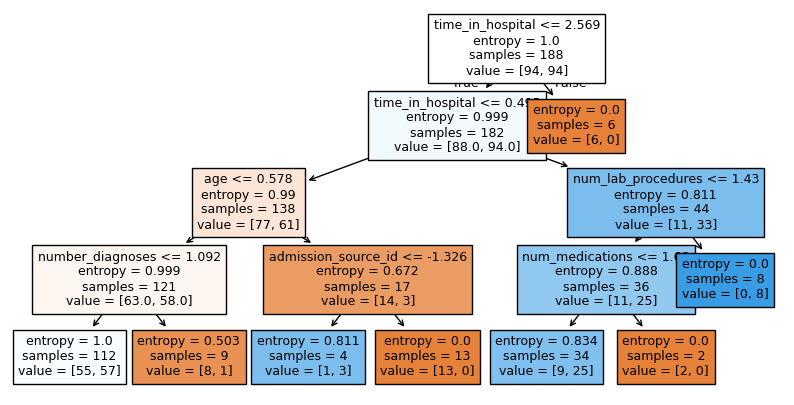

In [1265]:
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(arbol, max_depth=arbol.get_depth(), feature_names=X.columns,filled=True, fontsize=9)

In [1266]:
param_grid = {
    'criterion':['gini', 'entropy'], 
    'max_depth':[4, 8,10,12]
}

In [1267]:
arbol = DecisionTreeClassifier(random_state=0)
mejor_modelo = GridSearchCV(arbol, param_grid, cv=2, scoring='recall_macro' )#particiones)
mejor_modelo.fit(X_train_clasi, Y_train_clasi)
print(mejor_modelo.best_params_)

print('Exactitud: %.2f' % accuracy_score(Y_train_clasi, y_pred_train))
print("Recall: {}".format(recall_score(Y_train_clasi, y_pred_train, average='macro')))
print("Precisión: {}".format(precision_score(Y_train_clasi, y_pred_train, average='macro')))
print("Puntuación F1: {}".format(f1_score(Y_train_clasi, y_pred_train, average='macro')))
print(classification_report(Y_train_clasi, y_pred_train))

{'criterion': 'gini', 'max_depth': 10}
Exactitud: 1.00
Recall: 1.0
Precisión: 1.0
Puntuación F1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        94

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



In [1268]:
from sklearn.model_selection import GridSearchCV, KFold

# Definir el modelo
arbol = DecisionTreeClassifier(random_state=0)

# Definir los parámetros a buscar
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [4, 8, 10, 12]
}

# Definir el k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Configurar GridSearchCV con k-fold
mejor_modelo = GridSearchCV(arbol, param_grid, cv=kf, scoring='recall_macro')

# Ajustar el modelo
mejor_modelo.fit(X_train_clasi, Y_train_clasi)

# Obtener los mejores parámetros
print(mejor_modelo.best_params_)

# Evaluar el mejor modelo
best_arbol = mejor_modelo.best_estimator_

y_pred_train = best_arbol.predict(X_train_clasi)
print('Exactitud: %.2f' % accuracy_score(Y_train_clasi, y_pred_train))
print("Recall: {}".format(recall_score(Y_train_clasi, y_pred_train, average='macro')))
print("Precisión: {}".format(precision_score(Y_train_clasi, y_pred_train, average='macro')))
print("Puntuación F1: {}".format(f1_score(Y_train_clasi, y_pred_train, average='macro')))
print(classification_report(Y_train_clasi, y_pred_train))

y_pred_validation24 = best_arbol.predict(X_test_clasi)
print("VALIDACIÓN")
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred_validation24))
print("Recall: {}".format(recall_score(Y_test, y_pred_validation24, average='macro')))
print("Precisión: {}".format(precision_score(Y_test, y_pred_validation24, average='macro')))
print("Puntuación F1: {}".format(f1_score(Y_test, y_pred_validation24, average='macro')))
print(classification_report(Y_test, y_pred_validation24))

{'criterion': 'gini', 'max_depth': 10}
Exactitud: 0.91
Recall: 0.9095744680851063
Precisión: 0.910736579275905
Puntuación F1: 0.909510461791104
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        94
           1       0.93      0.88      0.91        94

    accuracy                           0.91       188
   macro avg       0.91      0.91      0.91       188
weighted avg       0.91      0.91      0.91       188

VALIDACIÓN
Exactitud: 0.52
Recall: 0.5336700336700337
Precisión: 0.5375
Puntuación F1: 0.5099971838918614
              precision    recall  f1-score   support

           0       0.47      0.70      0.57        27
           1       0.60      0.36      0.45        33

    accuracy                           0.52        60
   macro avg       0.54      0.53      0.51        60
weighted avg       0.54      0.52      0.50        60



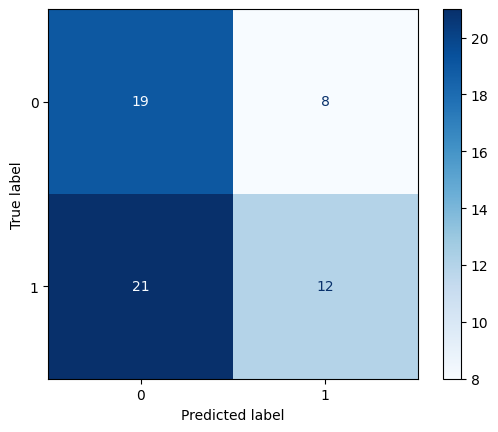

In [1269]:
cm = confusion_matrix(Y_test, y_pred_validation24)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_arbol.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

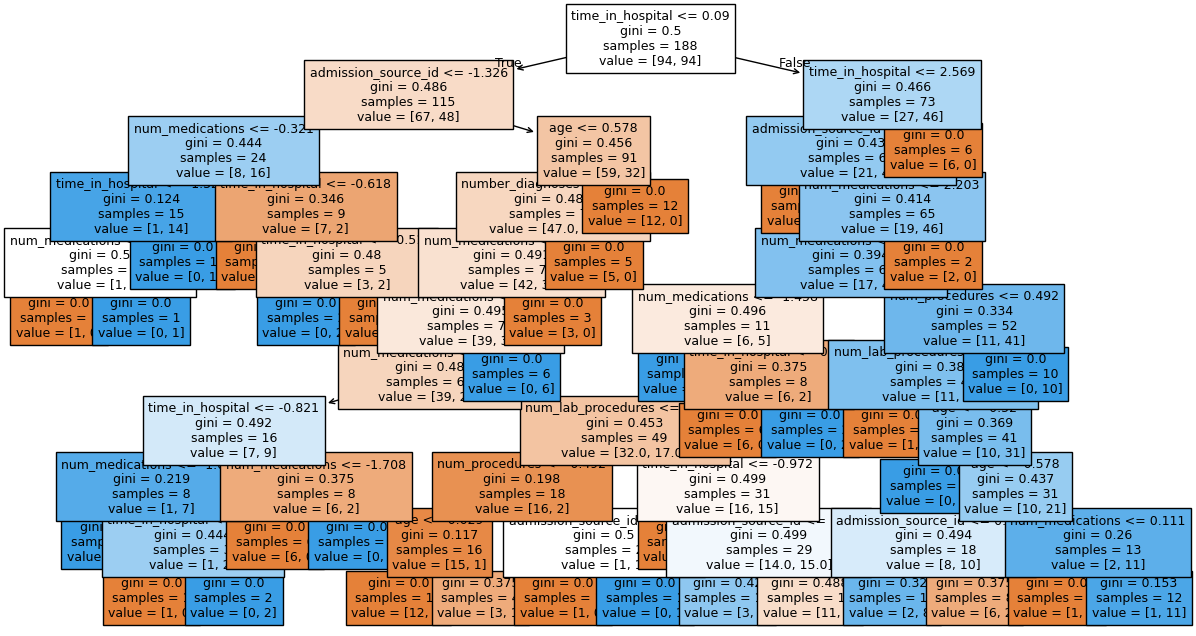

In [1270]:
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(best_arbol, max_depth=best_arbol.get_depth(), feature_names=X.columns,filled=True, fontsize=9)

#### Gradient boost

In [1271]:
from sklearn.ensemble import  GradientBoostingClassifier

clasificador_gradiente = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_clf = clasificador_gradiente.fit(X_train_clasi, Y_train_clasi)

y_pred_train3 = clasificador_gradiente.predict(X_train_clasi)

print("ENTRENAMIENTO")
print('Exactitud: %.2f' % accuracy_score(Y_train_clasi, y_pred_train3))
print("Recall: {}".format(recall_score(Y_train_clasi, y_pred_train3, average='macro')))
print("Precisión: {}".format(precision_score(Y_train_clasi, y_pred_train3, average='macro')))
print("Puntuación F1: {}".format(f1_score(Y_train_clasi, y_pred_train3, average='macro')))
print(classification_report(Y_train_clasi, y_pred_train3))

y_pred_validation32 = gb_clf.predict(X_test_clasi)
print("VALIDACIÓN")
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred_validation32))
print("Recall: {}".format(recall_score(Y_test, y_pred_validation32, average='macro')))
print("Precisión: {}".format(precision_score(Y_test, y_pred_validation32, average='macro')))
print("Puntuación F1: {}".format(f1_score(Y_test, y_pred_validation32, average='macro')))
print(classification_report(Y_test, y_pred_validation32))


ENTRENAMIENTO
Exactitud: 0.94
Recall: 0.9414893617021276
Precisión: 0.9415393322014715
Puntuación F1: 0.9414877061935885
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        94
           1       0.95      0.94      0.94        94

    accuracy                           0.94       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188

VALIDACIÓN
Exactitud: 0.53
Recall: 0.5488215488215489
Precisión: 0.5531135531135531
Puntuación F1: 0.5286195286195287
              precision    recall  f1-score   support

           0       0.49      0.70      0.58        27
           1       0.62      0.39      0.48        33

    accuracy                           0.53        60
   macro avg       0.55      0.55      0.53        60
weighted avg       0.56      0.53      0.52        60



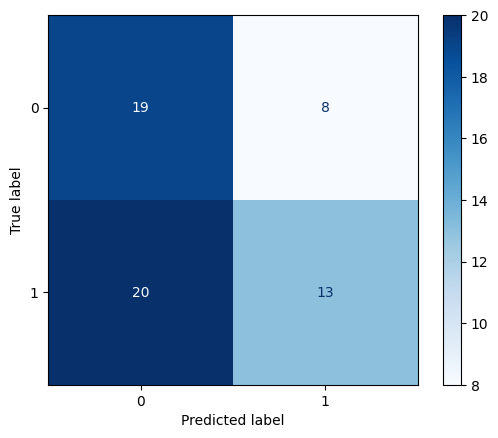

In [1272]:
cm = confusion_matrix(Y_test, y_pred_validation32)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [1273]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 5]
}
clasificador_gradiente_final = GradientBoostingClassifier(random_state=0)
#particiones = KFold(n_splits=10, shuffle=True, random_state=0)
mejor_modelo = GridSearchCV(clasificador_gradiente_final, param_grid, cv=2)
mejor_modelo.fit(X_train_clasi, Y_train_clasi)
mejor_modelo.best_params_

{'max_depth': 5, 'n_estimators': 100}

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}
ENTRENAMIENTO
Exactitud: 0.90
Recall: 0.898936170212766
Precisión: 0.901160805735746
Puntuación F1: 0.8987958634367474
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        94
           1       0.93      0.86      0.90        94

    accuracy                           0.90       188
   macro avg       0.90      0.90      0.90       188
weighted avg       0.90      0.90      0.90       188

VALIDACIÓN
Exactitud: 0.42
Recall: 0.4461279461279461
Precisión: 0.4166666666666667
Puntuación F1: 0.37777777777777777
              precision    recall  f1-score   support

           0       0.42      0.74      0.53        27
           1       0.42      0.15      0.22        33

    accuracy                           0.42        60
   macro avg       0.42      0.45      0.38        60
weighted avg       0.42      0.42      0.36        60



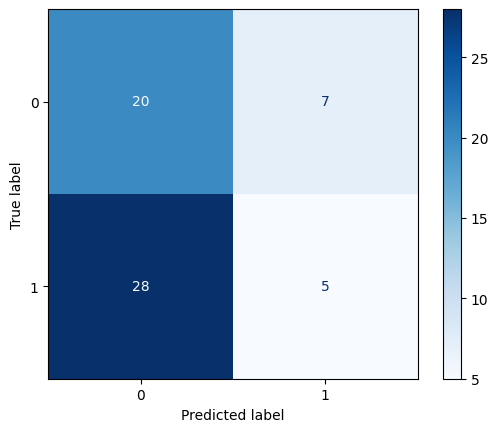

In [1274]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

gb_clf = GradientBoostingClassifier(random_state=0)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
particiones = KFold(n_splits=5, shuffle=True, random_state=0)

mejor_modelo = GridSearchCV(gb_clf, param_grid, cv=particiones, scoring='accuracy')

mejor_modelo.fit(X_train_clasi, Y_train_clasi)

print(mejor_modelo.best_params_)

best_gb_clf = mejor_modelo.best_estimator_

y_pred_train = best_gb_clf.predict(X_train_clasi)
print("ENTRENAMIENTO")
print('Exactitud: %.2f' % accuracy_score(Y_train_clasi, y_pred_train))
print("Recall: {}".format(recall_score(Y_train_clasi, y_pred_train, average='macro')))
print("Precisión: {}".format(precision_score(Y_train_clasi, y_pred_train, average='macro')))
print("Puntuación F1: {}".format(f1_score(Y_train_clasi, y_pred_train, average='macro')))
print(classification_report(Y_train_clasi, y_pred_train))

y_pred_validation = best_gb_clf.predict(X_test_clasi)
print("VALIDACIÓN")
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred_validation))
print("Recall: {}".format(recall_score(Y_test, y_pred_validation, average='macro')))
print("Precisión: {}".format(precision_score(Y_test, y_pred_validation, average='macro')))
print("Puntuación F1: {}".format(f1_score(Y_test, y_pred_validation, average='macro')))
print(classification_report(Y_test, y_pred_validation))

cm = confusion_matrix(Y_test, y_pred_validation)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gb_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Persistencia

In [1275]:
import joblib
from joblib import dump, load

filename = "modelo_clasificacion.joblib"
dump(best_gb_clf, filename)

['modelo_clasificacion.joblib']

In [1276]:
# Cargar el modelo desde el archivo .joblib
modelo_cargado = joblib.load(filename)

# Hacer predicciones con el modelo cargado
y_pred_nuevo = modelo_cargado.predict(X_test_clasi)

# Evaluación del modelo cargado
print("Exactitud:", accuracy_score(Y_test, y_pred_nuevo))
print("Recall:", recall_score(Y_test, y_pred_nuevo))
print("Precisión:", precision_score(Y_test, y_pred_nuevo))
print("Puntuación F1:", f1_score(Y_test, y_pred_nuevo))


Exactitud: 0.4166666666666667
Recall: 0.15151515151515152
Precisión: 0.4166666666666667
Puntuación F1: 0.2222222222222222


---

## Clasificacion de texto


In [1277]:
"""textos = datatrain.copy()
textos["message"] = (textos["Titulo"] + " " + textos["Descripcion"]).astype(str)
textos = textos.drop(columns=["ID", "Titulo", "Descripcion", "Fecha"])

textos.head(4)"""

'textos = datatrain.copy()\ntextos["message"] = (textos["Titulo"] + " " + textos["Descripcion"]).astype(str)\ntextos = textos.drop(columns=["ID", "Titulo", "Descripcion", "Fecha"])\n\ntextos.head(4)'

In [1278]:
"""import nltk

nltk.download('stopwords')

# Tokenizer preentrenado 
nltk.download('punkt')

# Lexico WordNet lematización y otras tareas léxicas
nltk.download('wordnet')

# Open Multilingual Wordnet (OMW)soporte multilingüe en WordNet
nltk.download('omw-1.4')
"""

"import nltk\n\nnltk.download('stopwords')\n\n# Tokenizer preentrenado \nnltk.download('punkt')\n\n# Lexico WordNet lematización y otras tareas léxicas\nnltk.download('wordnet')\n\n# Open Multilingual Wordnet (OMW)soporte multilingüe en WordNet\nnltk.download('omw-1.4')\n"

In [1279]:
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk import word_tokenize, sent_tokenize
import contractions
import re

def aMinusculas(palabras):
    return [palabra.lower() for palabra in palabras]

def eliminarNumeros(palabras):
    return [re.sub(r'\d+', '', palabra) for palabra in palabras]

def eliminarPuntuacion(palabras):
    return [palabra for palabra in palabras if palabra not in string.punctuation]

def removerNoAscii(palabras):
    return [palabra for palabra in palabras if palabra.isascii()]

def eliminarStopwords(palabras):
    sw = set(stopwords.words('spanish'))
    return [palabra for palabra in palabras if palabra not in sw]

def aplicarStemmingYLematizacion(palabras):
    # Evidenciamos que brinda mejores resultados que PorterStemmer para español
    stemmer = SnowballStemmer('spanish')
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(stemmer.stem(palabra)) for palabra in palabras]

def preprocesar(palabras):
    palabras = aMinusculas(palabras)
    palabras = eliminarNumeros(palabras)
    palabras = eliminarPuntuacion(palabras)
    palabras = removerNoAscii(palabras)
    palabras = eliminarStopwords(palabras)
    return palabras

def procesar(texto):
    texto = contractions.fix(texto)
    palabras = word_tokenize(texto)
    palabras = preprocesar(palabras)
    palabras = aplicarStemmingYLematizacion(palabras)
    return " ".join(palabras)

In [1280]:
"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer

def text_preprocessing_function(x):
    return x.apply(procesar)

def vectorization_function(x):
    return pd.DataFrame(bv.transform(x).toarray(), columns=bv.get_feature_names_out())

def scaling_function(x):
    return pd.DataFrame(scaler.transform(x), columns=bv.get_feature_names_out())

# Crear un pipeline para el procesamiento del texto, la transformación del conjunto de test y la clasificación
pipeline = Pipeline([
    # Paso 1: Preprocesar el texto
    ('text_preprocessing', FunctionTransformer(text_preprocessing_function)),

    # Paso 2: Vectorizar el texto (usando el vectorizador preentrenado)
    ('vectorization', FunctionTransformer(vectorization_function)),

    # Paso 3: Escalar las características (usando el escalador preentrenado)
    ('scaling', FunctionTransformer(scaling_function)),

    # Paso 4: Clasificar el texto 
    ('classification', best_gb_clf) 
])

dump(pipeline, 'pipeline.joblib')



"""

"\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler, FunctionTransformer\n\ndef text_preprocessing_function(x):\n    return x.apply(procesar)\n\ndef vectorization_function(x):\n    return pd.DataFrame(bv.transform(x).toarray(), columns=bv.get_feature_names_out())\n\ndef scaling_function(x):\n    return pd.DataFrame(scaler.transform(x), columns=bv.get_feature_names_out())\n\n# Crear un pipeline para el procesamiento del texto, la transformación del conjunto de test y la clasificación\npipeline = Pipeline([\n    # Paso 1: Preprocesar el texto\n    ('text_preprocessing', FunctionTransformer(text_preprocessing_function)),\n\n    # Paso 2: Vectorizar el texto (usando el vectorizador preentrenado)\n    ('vectorization', FunctionTransformer(vectorization_function)),\n\n    # Paso 3: Escalar las características (usando el escalador preentrenado)

In [1281]:
"""
textos["words"] = textos["message"].apply(procesar)
textos.head(4)
"""

'\ntextos["words"] = textos["message"].apply(procesar)\ntextos.head(4)\n'

Separacion y NM-gramas

In [1282]:
"""from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

# Inicializar el vectorizador 
bv = CountVectorizer(ngram_range=(1, 3), min_df=2, max_df=0.9, max_features=2000)

bv_matrix_message = bv.fit_transform(textos["words"])
bv_lista_message = bv_matrix_message.toarray()

vocab_messages = bv.get_feature_names_out()
vocab_messages

bv_df = pd.DataFrame(bv_lista_message, columns=bv.get_feature_names_out())
bv_df

bv_df = pd.concat([textos.drop(columns=["message", "words"]), bv_df], axis=1)
bv_df

Y = bv_df['Label']
X = bv_df.drop(['Label'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train

smt = SMOTE()
X_smote, Y_smote = smt.fit_resample(X_train, Y_train)
Y_smote = Y_smote.values.ravel()   

scaler = StandardScaler()
X_smote = pd.DataFrame(scaler.fit_transform(X_smote), columns=vocab_messages)
X_test = pd.DataFrame(scaler.transform(X_test), columns=vocab_messages)

X_smote

# 1000 palabras (o n-gramas) más frecuentes
palabras_mas_usadas_smote1 = X_smote.sum(axis=0).nlargest(1000).index

X_smote1_knn = X_smote[palabras_mas_usadas_smote1].reindex(X_smote.index)
X_test1_knn = X_test[palabras_mas_usadas_smote1].reindex(X_test.index)



"""

'from sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.preprocessing import StandardScaler\n\n# Inicializar el vectorizador \nbv = CountVectorizer(ngram_range=(1, 3), min_df=2, max_df=0.9, max_features=2000)\n\nbv_matrix_message = bv.fit_transform(textos["words"])\nbv_lista_message = bv_matrix_message.toarray()\n\nvocab_messages = bv.get_feature_names_out()\nvocab_messages\n\nbv_df = pd.DataFrame(bv_lista_message, columns=bv.get_feature_names_out())\nbv_df\n\nbv_df = pd.concat([textos.drop(columns=["message", "words"]), bv_df], axis=1)\nbv_df\n\nY = bv_df[\'Label\']\nX = bv_df.drop([\'Label\'], axis=1)\n\nX_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)\nX_train\n\nsmt = SMOTE()\nX_smote, Y_smote = smt.fit_resample(X_train, Y_train)\nY_smote = Y_smote.values.ravel()   \n\nscaler = StandardScaler()\nX_smote = pd.DataFrame(scaler.fit_transform(X_smote), columns=vocab_messages)\nX_test = pd.DataFrame(scaler.transform(X_test), col

---
---

# Regresion lineal


In [1283]:
from sklearn.linear_model import LinearRegression

regression_1 = LinearRegression()
regression_1.fit(X_train, Y_train)


LinearRegression()

In [1284]:
columnas = X_train.columns
pd.DataFrame({"columns": columnas, "coef": regression_1.coef_}) 

,columns,coef
0,num_lab_procedures,0.000965
1,num_medications,0.005043
2,age,0.016132
3,time_in_hospital,0.009552
4,number_diagnoses,-0.008590
5,num_procedures,-0.010339
6,admission_source_id,0.016348
7,admission_type_id,-0.018725
8,discharge_disposition_id,0.014161
9,insulin,0.076131


In [1285]:
print("Intercepto: " + str(regression_1.intercept_))

Intercepto: -0.25342831343841116


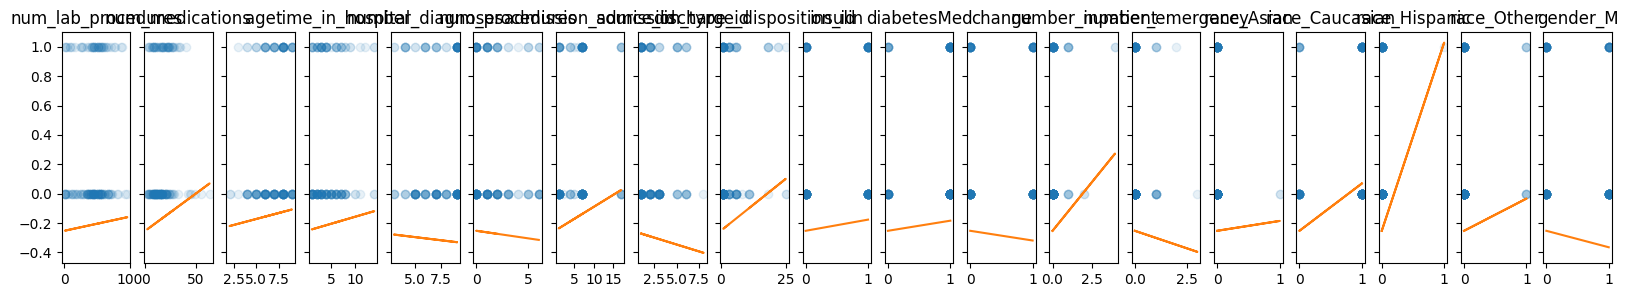

In [1286]:
f, axs = plt.subplots(1, len(columnas), sharey=True, figsize=(20, 3))

for i in range(len(columnas)):
    col = columnas[i]
    x = X_train[col]
    m = regression_1.coef_[i]
    b = regression_1.intercept_

    axs[i].plot(x, Y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

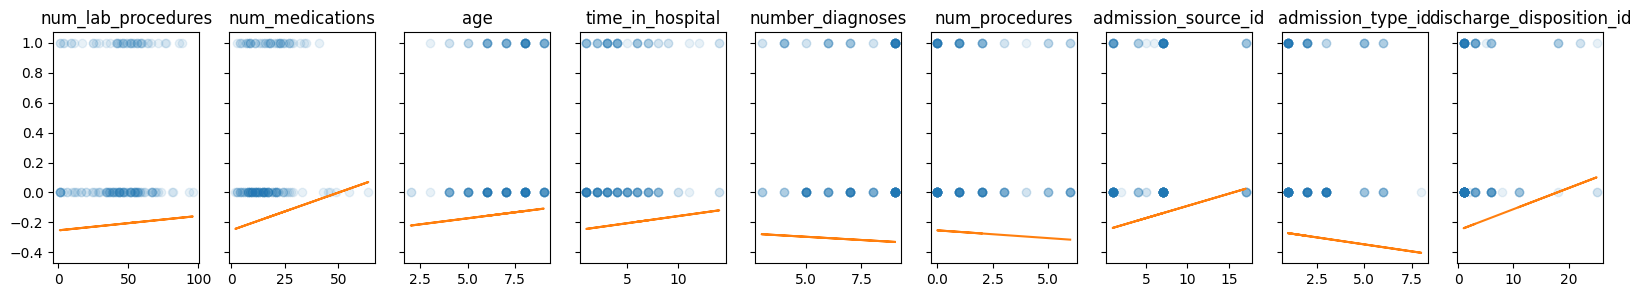

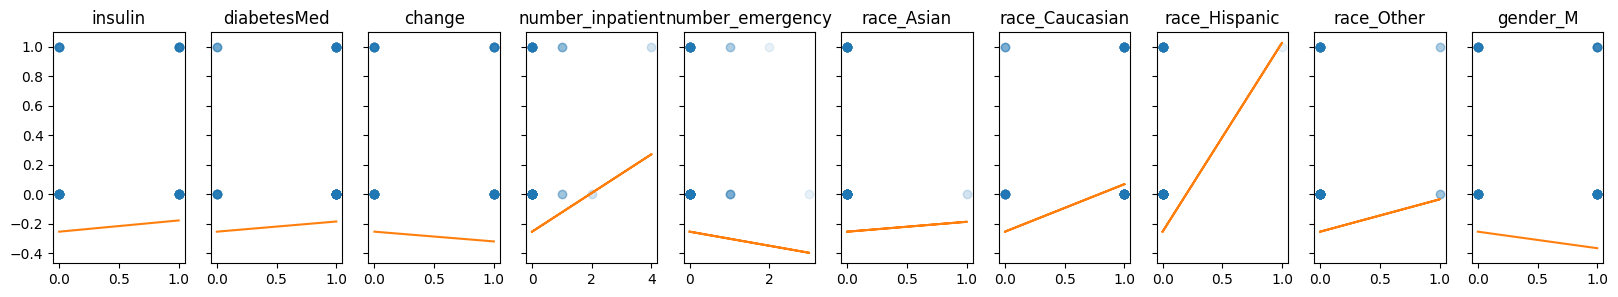

In [1287]:
n_cols = len(columnas) // 2

f, axs = plt.subplots(1, n_cols, sharey=True, figsize=(20, 3))
for i in range(n_cols):
    col = columnas[i]
    x = X_train[col]
    m = regression_1.coef_[i]
    b = regression_1.intercept_
    axs[i].plot(x, Y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

f, axs = plt.subplots(1, len(columnas) - n_cols, sharey=True, figsize=(20, 3))
for i in range(len(columnas) - n_cols):
    col = columnas[n_cols + i]
    x = X_train[col]
    m = regression_1.coef_[n_cols + i]
    b = regression_1.intercept_
    axs[i].plot(x, Y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [1288]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("\nMAE:")
print("Train:", mean_absolute_error(Y_train, regression_1.predict(X_train)))
print("Test:", mean_absolute_error(Y_test, regression_1.predict(X_test)))

print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(Y_train, regression_1.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(Y_test, regression_1.predict(X_test))))

print("\nR^2:")
print("Train:", r2_score(Y_train, regression_1.predict(X_train)))
print("Test:", r2_score(Y_test, regression_1.predict(X_test)))


MAE:
Train: 0.3614910712633203
Test: 0.4954105429745042

RMSE:
Train: 0.42056738044967934
Test: 0.5781588151203234

R^2:
Train: 0.19824522170055892
Test: -0.3505762242478232


#### Otro de regresion

In [1289]:
data_lineal = data_t.copy()
data_lineal["race"] = data["race"]

In [1290]:
features_numeric = columnas_numericas
features_categorical = ["race"]

X_train_5, X_test_5, Y_train_5, Y_test_5 = train_test_split( data_lineal[features_numeric + features_categorical],
    data_t["readmitted"], test_size=0.3, random_state=1 )

In [1291]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), features_numeric),  
        ("cat", OneHotEncoder(drop=None), features_categorical)  
    ]
)

pipeline5 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

pipeline5.fit(X_train_5, Y_train_5)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses']),
                                                 ('cat', OneHotEncoder(),
                                                  ['race'])])),
                ('model', LinearRegression())])

In [1292]:
model = pipeline5.named_steps["model"]
intercepto = model.intercept_
print(f"\nIntercepto de la regresión: {intercepto}")


Intercepto de la regresión: 0.4133556142227749


In [1293]:
coeficientes = model.coef_

# Nombres de las variables después de la transformación
feature_names = pipeline5.named_steps["preprocessor"].get_feature_names_out()

# Crear un DataFrame con coeficientes y nombres de variables
coef_df = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coeficientes
})

# Ordenar por el valor absoluto del coeficiente en orden descendente
coef_df["Valor_Absoluto"] = coef_df["Coeficiente"].abs()
coef_df = coef_df.sort_values(by="Valor_Absoluto", ascending=False).drop(columns="Valor_Absoluto")

# Mostrar resultados
print("\nCoeficientes ordenados por valor absoluto:")
coef_df



Coeficientes ordenados por valor absoluto:


,Variable,Coeficiente
10,cat__race_Hispanic,0.612505
8,cat__race_Asian,-0.402255
7,cat__race_AfricanAmerican,-0.162641
5,num__number_inpatient,0.072910
6,num__number_diagnoses,0.050487
11,cat__race_Other,-0.033843
1,num__num_lab_procedures,0.032690
2,num__num_procedures,0.025609
4,num__number_emergency,-0.025384
9,cat__race_Caucasian,-0.013767


In [1294]:
print("\nMAE:")
print("Train:", mean_absolute_error(Y_train_5, pipeline5.predict(X_train_5)))
print("Test:", mean_absolute_error(Y_test_5, pipeline5.predict(X_test_5)))

print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(Y_train_5, pipeline5.predict(X_train_5))))
print("Test:", np.sqrt(mean_squared_error(Y_test_5, pipeline5.predict(X_test_5))))

print("\nR^2:")
print("Train:", r2_score(Y_train_5, pipeline5.predict(X_train_5)))
print("Test:", r2_score(Y_test_5, pipeline5.predict(X_test_5)))


MAE:
Train: 0.43237517882309096
Test: 0.46329676098789474

RMSE:
Train: 0.46455341238945247
Test: 0.5018113013624098

R^2:
Train: 0.07563953014234692
Test: -0.01743265525266735


#### Linealidad

In [1295]:
X_train_5

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_inpatient,number_diagnoses,race
116,8,58,6,43,0,0,9,Caucasian
67,5,52,0,11,0,0,9,Caucasian
78,3,46,0,6,0,0,5,AfricanAmerican
42,1,17,0,3,1,0,4,Caucasian
17,6,71,2,18,0,0,6,Caucasian
...,...,...,...,...,...,...,...,...
133,3,1,1,10,0,0,9,Other
137,4,70,1,10,0,0,5,AfricanAmerican
72,6,48,0,23,0,0,9,AfricanAmerican
140,6,44,2,45,0,0,5,Caucasian


In [1296]:
from sklearn.preprocessing import PolynomialFeatures

pipeline62 = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)
pipeline62.fit(X_train_5[features_numeric], Y_train_5)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

pd.DataFrame({"columns": pipeline62["poly"].get_feature_names_out(), "coef": pipeline62["model"].coef_}).head(4) #ver mas


,columns,coef
0,time_in_hospital,-0.135760
1,num_lab_procedures,-0.092853
2,num_procedures,0.052840
3,num_medications,0.324330


In [1297]:
print("MAE:")
print("Train:", mean_absolute_error(Y_train_5, pipeline62.predict(X_train_5[features_numeric])))
print("Test:", mean_absolute_error(Y_test_5, pipeline62.predict(X_test_5[features_numeric])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(Y_train_5, pipeline62.predict(X_train_5[features_numeric]))))
print("Test:", np.sqrt(mean_squared_error(Y_test_5, pipeline62.predict(X_test_5[features_numeric]))))

MAE:
Train: 0.3723578974073483
Test: 0.6933829330028871

RMSE:
Train: 0.42053772490010927
Test: 0.8902758420801917


#### Errores normales

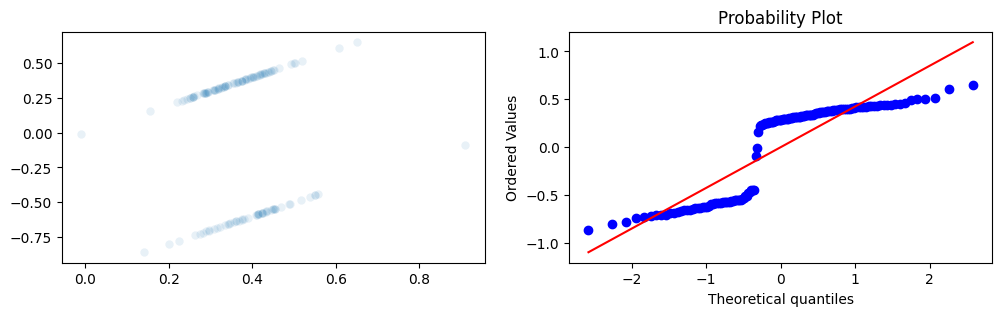

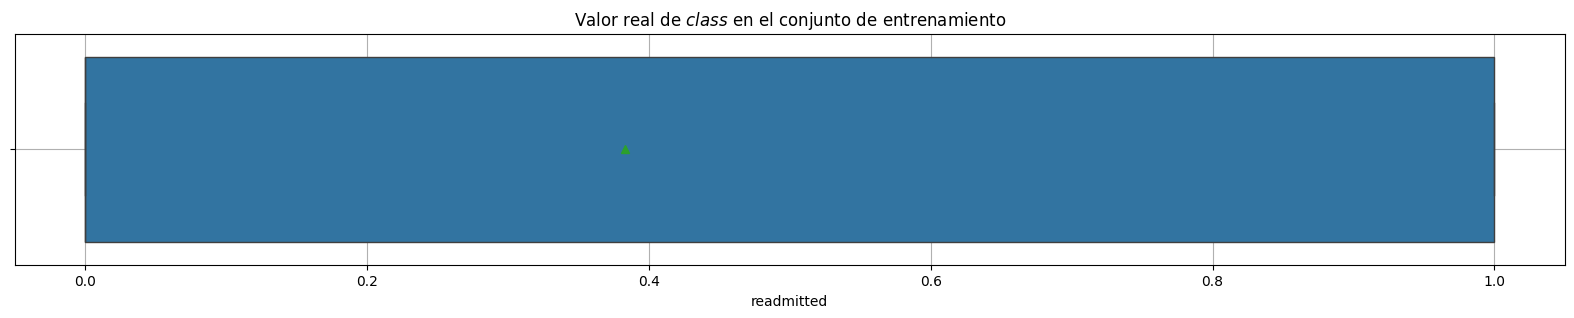

In [1298]:
import scipy.stats as stats
pipeline63 = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)
pipeline63.fit(X_train_5[features_numeric], Y_train_5)

errors = (pipeline63.predict(X_train_5[features_numeric])-Y_train_5).values
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
sns.scatterplot(x=pipeline63.predict(X_train_5[features_numeric]), y=errors, alpha=0.1, ax=axes[0])
_ = stats.probplot(errors, dist="norm", plot=axes[1])

plt.figure(figsize=(20, 3))
sns.boxplot(x=y_train, showmeans=True, orient="h")
plt.title("Valor real de $\t{class}$ en el conjunto de entrenamiento")
plt.grid()
plt.show()

In [1299]:
q1 = Y_train_5.quantile(0.25)
q3 = Y_train_5.quantile(0.75)
iqr = q3-q1
threshold = q3+1.5*iqr
threshold

y_trainc = Y_train_5.loc[Y_train_5 <= threshold]
x_trainc = X_train_5.loc[y_trainc.index]

y_testc = Y_test_5.loc[Y_test_5 <= threshold]
x_testc = X_test_5.loc[y_testc.index]

pipeline63.fit(x_trainc[features_numeric], y_trainc)


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [1300]:
pd.DataFrame({"columns": features_numeric, "coef": pipeline63["model"].coef_})
print("MAE:")
print("Train:", mean_absolute_error(y_trainc, pipeline63.predict(x_trainc[features_numeric])))
print("Test:", mean_absolute_error(y_testc, pipeline63.predict(x_testc[features_numeric])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_trainc, pipeline63.predict(x_trainc[features_numeric]))))
print("Test:", np.sqrt(mean_squared_error(y_testc, pipeline63.predict(x_testc[features_numeric]))))

MAE:
Train: 0.4459416641920872
Test: 0.47148632068756247

RMSE:
Train: 0.4721234648738138
Test: 0.5022158571921246


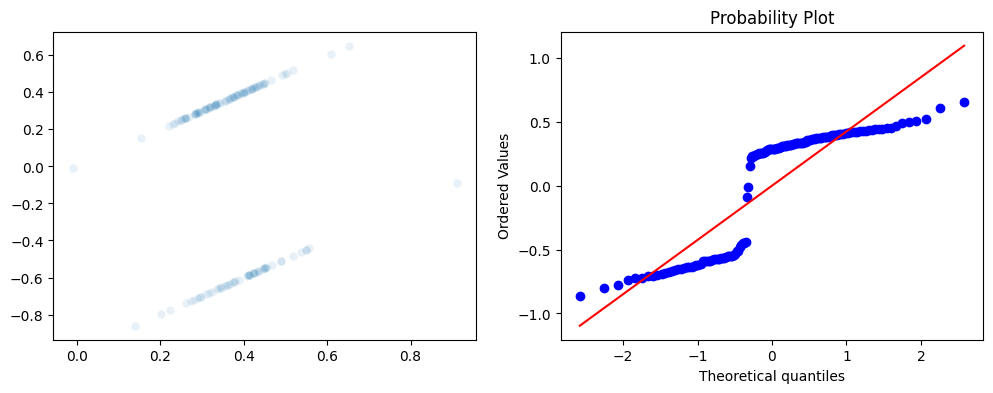

In [1301]:
errors = (pipeline63.predict(x_trainc[features_numeric])-y_trainc).values

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(x=pipeline63.predict(x_trainc[features_numeric]), y=errors, alpha=0.1, ax=axes[0])
_ = stats.probplot(errors, dist="norm", plot=axes[1])

### Varianza constante - Homoceasticidad

<Axes: >

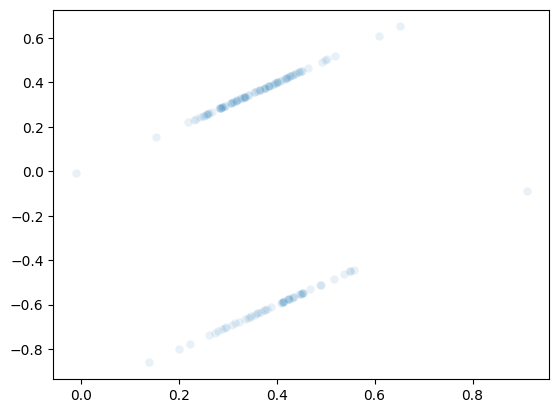

In [1302]:
sns.scatterplot(x = pipeline63.predict(x_trainc[features_numeric]), y=errors, alpha=0.1)

In [1303]:
from joblib import dump, load

filename = "model_redshift.joblib"
dump(pipeline5, filename)

['model_redshift.joblib']

In [1304]:
pipeline_loaded = load(filename)

X_total = data_lineal
y_total = data_lineal["readmitted"]  

y_pred_total = pipeline_loaded.predict(X_total)

mae = mean_absolute_error(y_total, y_pred_total)
rmse = np.sqrt(mean_squared_error(y_total, y_pred_total))
r2 = r2_score(y_total, y_pred_total)

# Imprimir resultados
print("\nEvaluación del modelo con toda la población:")
print(f"MAE: {mae:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"R^2: {r2:.5f}")


Evaluación del modelo con toda la población:
MAE: 0.44165
RMSE: 0.47604
R^2: 0.05174
